In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data
insider_data = pd.read_csv("insider_trades_2020_2025.csv")
congress_data = pd.read_csv("capitoltrades.com raw data - Sheet1.csv")

In [ ]:
# Create lists of the tickers from each dataset
insider_tickers = np.unique(list(insider_data["ticker"]), return_counts=True)
insider_ticker_names = list(insider_data["ticker"])
congress_companies = (list(congress_data["Traded Issuer"]))
congress_ticker_names = []
for t in congress_companies:
  congress_ticker_names.append(t.split("\n")[1].replace(":US", ""))
congress_tickers = np.unique(congress_ticker_names, return_counts=True)

In [ ]:
# Count the occurances of each ticker in each dataset
all_ticker_counts = {}
all_tickers = []

for t in insider_ticker_names:
  t_str = str(t)
  if t in all_tickers:
    all_ticker_counts[t_str] += 1
  else:
    all_ticker_counts[t_str] = 1
    all_tickers.append(t_str)

for t in congress_ticker_names:
  t_str = str(t)
  if t in all_tickers:
    all_ticker_counts[t_str] += 1
  else:
    all_ticker_counts[t_str] = 1
    all_tickers.append(t_str)

In [ ]:
# Load the lists of tickers with and without data
tickers_with_data = [[], []]

for line in open("tickers_used.txt"):
  t = line.replace("\n", "")
  tickers_with_data[0].append(t)
  tickers_with_data[1].append(all_ticker_counts[t])

tickers_without_data = [[], []]

for line in open("tickers_unused.txt"):
  t = line.replace("\n", "")
  tickers_without_data[0].append(t)
  tickers_without_data[1].append(all_ticker_counts[t])

1283
193


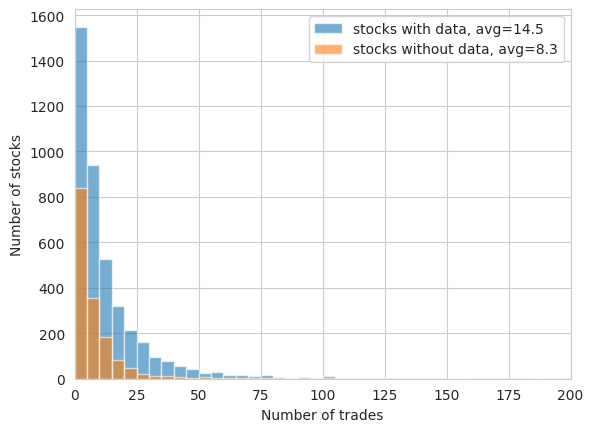

In [ ]:
# Plot the number of occurances of the tickers with and without data
plt.hist(tickers_with_data[1], bins=np.linspace(0,200,41), alpha=0.6)
plt.hist(tickers_without_data[1], bins=np.linspace(0,200,41), alpha=0.6)
plt.xlim([0,200])
plt.legend(["stocks with data, avg=14.5", "stocks without data, avg=8.3"])
plt.ylabel("Number of stocks")
plt.xlabel("Number of trades")
print(max(tickers_with_data[1]))
print(max(tickers_without_data[1]))

In [ ]:
# Calculate the average number of trades when a ticker has data
sum(tickers_with_data[1]) / len(tickers_with_data[1])

14.490791676632385

In [ ]:
# Calculate the average number of trades when a ticker does not have data
sum(tickers_without_data[1]) / len(tickers_without_data[1])

8.329588014981274

/tmp/ipython-input-2392384522.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(tickers_with_data[1]), bw=0.5)
/tmp/ipython-input-2392384522.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(tickers_without_data[1]), bw=0.5)


<Axes: ylabel='Density'>

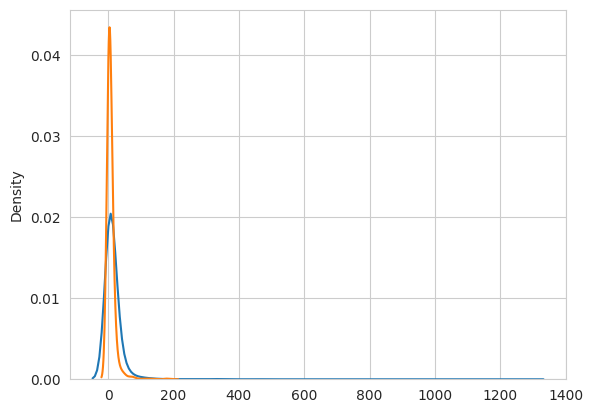

In [ ]:
# Create a denstity plot of the number of trades for each type of ticker
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(tickers_with_data[1]), bw=0.5)
sns.kdeplot(np.array(tickers_without_data[1]), bw=0.5)

In [ ]:
# Find the number of congress trades
congress_data.shape

(2304, 9)

In [ ]:
# Find the number of insider trades
insider_data.shape

(71712, 12)

In [ ]:
# Find the number of stocks with data
len(tickers_with_data[0])

4181

In [ ]:
# Find the number of stocks without data
len(tickers_without_data[0])

1602